# Get-First-N-Components

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(500)

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0, 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3 + np.random.normal(0, 10, size=100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

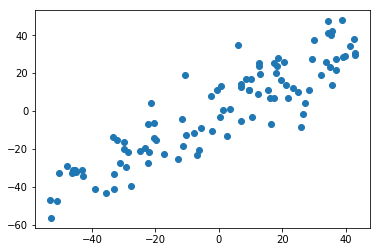

In [4]:
plt.scatter(X[:, 0], X[:, 1])

In [5]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
        
    return w

In [6]:
initial_w = np.random.random(X.shape[1])
eta = 0.001
w = gradient_ascent(X, initial_w, eta)
w

array([0.74974184, 0.66173044])

In [7]:
def first_n_component(n, X, eta=0.001, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = gradient_ascent(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    
    return res

In [8]:
first_n_component(2, X)

[array([0.74974113, 0.66173124]), array([-0.66171562,  0.74975492])]